# Projeto Machine Learning - Câncer de Mama

Esse é o nosso primeiro projeto de aplicação dos conhecimentos de Machine Learning, no curso de DataScience oferecido por ADA, e ministrado pelos professores Thiago Kuma e Arthur. 

### INFO:
Este conjunto de dados de pacientes com câncer de mama foi obtido na atualização de novembro de 2017 do Programa SEER do NCI, que fornece informações sobre estatísticas de câncer baseadas na população. O conjunto de dados envolveu pacientes do sexo feminino com carcinoma ductal infiltrante e lobular do câncer de mama (códigos de histologia 8522/3 do recodificação de cidades primárias do SEER) diagnosticados entre 2006-2010. Foram excluídos pacientes com tamanho desconhecido do tumor, linfonodos regionais examinados, linfonodos regionais positivos e pacientes cujos meses de sobrevida foram inferiores a 1 mês; assim, 4024 pacientes foram incluídos.

##### Criador:
Reihaneh Namdari (Owner)

https://www.kaggle.com/datasets/reihanenamdari/breast-cancer
##### Grupo de Trabalho:
- Alessa Santos
- Beatriz Guisso
- Guilherme Tonini
- João Luiz
- Thais Carvalho
- Thiago Lopes


### Objetivos:
No presente trabalho, iremos abordar os seguintes tópicos de implementação de Machine Learning:
##### Implementados:
- Feature Selection
- Conversão de Categóricos para Numéricos
- Balanceamento do dataset - Nota
- Divisão do dataset
- Feature Scaling
- Uso de um Algorítmo
- Pipeline
- Learning Curve
- Otimização de Hiperparâmetros
- Hiperparâmetros utilizados
-----
##### A implementar:
- Cross Validation
- Métrica de avaliação
- Mais de um algorítmo para comparação

----

## 1. Inicializando o projeto
Esse é o momento em que teremos o primeiro contato com o projeto. 

Além de abrí-lo no nosso notebook, daremos uma analisada nos tipos dos dados e também na busca por valores ausentes, ou nulos. É aqui deve entrar todo o tratamento de dados. 

In [1]:
# Importação dos pacotes gerais
import pandas as pd
import numpy as np

In [2]:
# Leitura do dataset para primeiras impressões
df = pd.read_csv('Breast_Cancer.csv')
df.head()

,Age,Race,Marital Status,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,White,Married,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,White,Divorced,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,White,Married,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,White,Married,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


In [3]:
# Analisando o tipo de dado e também a presença de valores nulos.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4024 entries, 0 to 4023
Data columns (total 16 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Age                     4024 non-null   int64 
 1   Race                    4024 non-null   object
 2   Marital Status          4024 non-null   object
 3   T Stage                 4024 non-null   object
 4   N Stage                 4024 non-null   object
 5   6th Stage               4024 non-null   object
 6   differentiate           4024 non-null   object
 7   Grade                   4024 non-null   object
 8   A Stage                 4024 non-null   object
 9   Tumor Size              4024 non-null   int64 
 10  Estrogen Status         4024 non-null   object
 11  Progesterone Status     4024 non-null   object
 12  Regional Node Examined  4024 non-null   int64 
 13  Reginol Node Positive   4024 non-null   int64 
 14  Survival Months         4024 non-null   int64 
 15  Stat

### 1.1. Conclusão:
Não foram encontrados dados faltantes, bem como não há a necessidade de modificarmos algum tipo de dado dentro do nosso dataset.

## 2. Feature Selection
Procuramos entender o siginificado de cada feature no dataset, e saber se esse é um dado significante para a determinação do diagnóstico.

Percebemos que a coluna "Race" que trata da raça do indivíduo, tanto quanto, "Marital Status" que indica o estado civil, não parecem ser relevantes para a definição do nosso target. Dessa forma, optamos por retirá-las do nosso dataset para trabalharmos.

In [4]:
# Retirando dados pouco relevantes para a nossa predição
df = df.drop(['Race', 'Marital Status'], axis=1)
df.head()

,Age,T Stage,N Stage,6th Stage,differentiate,Grade,A Stage,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status
0,68,T1,N1,IIA,Poorly differentiated,3,Regional,4,Positive,Positive,24,1,60,Alive
1,50,T2,N2,IIIA,Moderately differentiated,2,Regional,35,Positive,Positive,14,5,62,Alive
2,58,T3,N3,IIIC,Moderately differentiated,2,Regional,63,Positive,Positive,14,7,75,Alive
3,58,T1,N1,IIA,Poorly differentiated,3,Regional,18,Positive,Positive,2,1,84,Alive
4,47,T2,N1,IIB,Poorly differentiated,3,Regional,41,Positive,Positive,3,1,50,Alive


## 3. Conversão de Categóricos para Numéricos
Aqui, identificaremos os dados em cada feature categórica, e tranformaremos em numéricos.

### 3.1. Valores binários
Vamos fazer a modificação manual dos valores que são mais simples, que possuem saídas binárias. Dessa forma, assumirão valores "0" ou "1" dependendo do valor daquela feature.

In [5]:
# Identificando a saída de dados para as seguintes features:
print('Dados "Status":', df['Status'].unique())
print('Dados "Estrogen Status":', df['Estrogen Status'].unique())
print('Dados "Progesterone Status":', df['Progesterone Status'].unique())

Dados "Status": ['Alive' 'Dead']
Dados "Estrogen Status": ['Positive' 'Negative']
Dados "Progesterone Status": ['Positive' 'Negative']


In [6]:
# Modificando manualmente os valores das saídas para dados numéricos
renomear_1 = {
    'Dead': 0,
    'Alive': 1
}
renomear_2 = {
    'Negative': 0,
    'Positive': 1
}

df['Status'] = df['Status'].map(renomear_1)
df['Estrogen Status'] = df['Estrogen Status'].map(renomear_2)
df['Progesterone Status'] = df['Progesterone Status'].map(renomear_2)

### 3.2. Dummies
Para as outras features que possuem mais de 2 valores, usaremos o "get_dummies" do pacote Pandas. 

In [7]:
# Modificando os dados não binários com a ferramenta get_dummies do Pandas
df = pd.get_dummies(data=df, columns=[
                                        "T Stage ",
                                        "N Stage",
                                        "6th Stage",
                                        "differentiate",
                                        "Grade",
                                        "A Stage"]
                                    , drop_first=True)


### 3.3. Conclusão
Dessa forma, estamos prontos para começar a trabalhar. Assim ficou o nosso dataset:

In [8]:
df.head()

,Age,Tumor Size,Estrogen Status,Progesterone Status,Regional Node Examined,Reginol Node Positive,Survival Months,Status,T Stage _T2,T Stage _T3,...,6th Stage_IIIA,6th Stage_IIIB,6th Stage_IIIC,differentiate_Poorly differentiated,differentiate_Undifferentiated,differentiate_Well differentiated,Grade_1,Grade_2,Grade_3,A Stage_Regional
0,68,4,1,1,24,1,60,1,0,0,...,0,0,0,1,0,0,0,0,1,1
1,50,35,1,1,14,5,62,1,1,0,...,1,0,0,0,0,0,0,1,0,1
2,58,63,1,1,14,7,75,1,0,1,...,0,0,1,0,0,0,0,1,0,1
3,58,18,1,1,2,1,84,1,0,0,...,0,0,0,1,0,0,0,0,1,1
4,47,41,1,1,3,1,50,1,1,0,...,0,0,0,1,0,0,0,0,1,1


## 4. Balanceamento - Nota

In [9]:
# Analisando a distribuição dos resultados
(df['Status'].value_counts(normalize=True)*100).round(2)

1    84.69
0    15.31
Name: Status, dtype: float64

Como foi observado, não possuímos um balanceamento adequado dos dados para ambos resultados. Isso provoca uma falha na capacidade do algorítmo de identificar resultados com o valor "0".

Seria necessário fazer o trabalho de balanceamento, porém, por falta de tempo para abordarmos esse tema em aula, não será aplicado aqui.

## 5. Divisão - Treino e Teste
Nesse momento, faremos a divisão do dataset, para que possamos submetê-lo ao treinamento e teste, sem que o nosso resultado seja contaminado com informações indesejadas. Essa é uma das partes mais importantes.

In [10]:
# Importação dos pacotes necessários:
from sklearn.model_selection import train_test_split

In [11]:
# Definindo o nosso X e y a ser trabalhado
X = df.drop(columns=['Status'])
y = df['Status']

In [12]:
# Criando SEED para random_state
SEED = 42
np.random.seed(SEED)

# Separando os dados para treino e teste para X e y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y)

### 5.1. Conclusão
Fizemos a separação dos datasets para treino e teste. E é importante frizar o uso do parâmetro "stratify", que distribui de forma equânime a proporção de observações "0" e "1" entre os datasets.

## 6. Feature Scaling

In [13]:
# Importando os pacotes necessários
from sklearn.preprocessing import StandardScaler
scaler_train = StandardScaler()

Uma observação importante é que precisamos fazer o Scaling no projeto após o dataset ter sido divido. Isso porque no contrário, pode haver vazamento de dados de X para o nosso target, o que tornaria a análise viciada.

In [14]:
# Aplicando o scaler
X_train_std = scaler_train.fit_transform(X_train)
X_test_std = scaler_train.fit_transform(X_test)

## 7. Uso do Algorítmo
Aqui a brincadeira começa a ficar séria. Vamos aplicar o nosso Algorítmo!!

Como estamos tratando de uma saída binária, trabalharemos com um algorítmo de CLASSIFICAÇÃO. Escolhemos usar uma ÁRVORE DE DECISÃO.

In [15]:
# Importando pacotes necessários.
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn import tree
from matplotlib import pyplot as plt

# Criando o modelo
modelo = DecisionTreeClassifier()

In [16]:
# Fazendo o Fit dos dados no Modelo
modelo.fit(X_train_std, y_train)

DecisionTreeClassifier()

In [17]:
# Criando a predição do modelo
y_pred = modelo.predict(X_test_std)

In [18]:
# Imprimendo e comparando os resultados
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.41      0.48      0.44       123
           1       0.90      0.88      0.89       682

    accuracy                           0.81       805
   macro avg       0.66      0.68      0.67       805
weighted avg       0.83      0.81      0.82       805



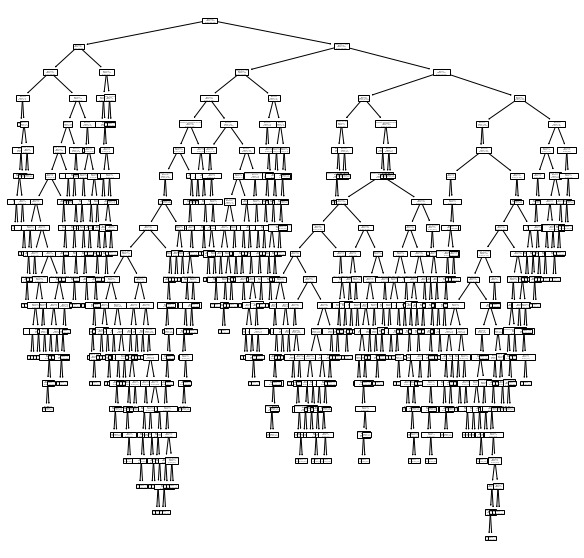

In [19]:
plt.figure(figsize=(10, 10))
tree.plot_tree(modelo, feature_names=X_train.columns)
plt.show()

### 7.1. Conclusão
Não conseguimos dizer se o modelo desempenhou bem ou não, porque não temos mais parâmetros de comparação.

## 8. Pipeline

In [20]:
# Importando pacotes necessários
from sklearn.pipeline import Pipeline

In [21]:
# Criando pipeline
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', DecisionTreeClassifier())
])

## 9. Learning Curve
Aqui será construída uma função que nos auxiliará a demonstrar a linha de aprendizagem do nosso modelo, de acordo com a profundidade da árvore.

In [22]:
# Importando pacotes necessários
from sklearn.metrics import f1_score

In [23]:
# Função de criação dos pontos que representam os erros, para ser plotado.
def aprendizado_profundidade(range_profundidade, indice_ordenado_features, X_train, X_test, y_train, y_test):
    erros_train = []
    erros_test = []
    for profundidade in range_profundidade:
        modelo = DecisionTreeClassifier(random_state=42, max_depth=profundidade)

        X_train_temp = X_train
        X_test_temp = X_test

        modelo.fit(X_train_temp, y_train)

        y_pred_train = modelo.predict(X_train_temp)
        y_pred_test = modelo.predict(X_test_temp)

        erros_train.append(f1_score(y_train, y_pred_train))
        erros_test.append(f1_score(y_test, y_pred_test))
        
    return range_profundidade, erros_train, erros_test

In [24]:
# Cálculo da correlação emparelhada das colunas
corr_mat = df.corr(method='pearson')
corr = corr_mat

# Valores das correlações e nome das features em relação ao target, em ordem decrescente.
corr_mat['Status'].abs().sort_values(ascending=False)
indice_ordenado_features = corr_mat['Status'].abs().sort_values(ascending=False).index

# Retornando valores para construção do gráfico
range_profundidade, erros_train, erros_test = aprendizado_profundidade(list(range(1, 20)), indice_ordenado_features, X_train_std, X_test_std, y_train, y_test)

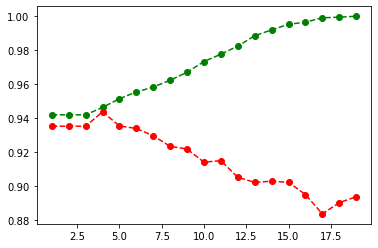

In [25]:
# Plotando o gráfico que demonstra os erros para treino e teste 
plt.plot(range_profundidade, erros_train, 'o--', color='g')
plt.plot(range_profundidade, erros_test, 'o--', color='r')

## 10. Otimização de Hiperparâmetros

In [26]:
# Importando pacotes necessários
from sklearn.model_selection import GridSearchCV

In [27]:
param_grid = {
    'model__criterion': ['gini', 'entropy'],
    'model__max_features': [4, 8, 12, 16, 20, 24],
    'model__max_depth': [None, 4, 8, 10, 12],
    'model__class_weight': [None, 'balanced']
}

In [28]:
grid_search = GridSearchCV(estimator=pipe, param_grid=param_grid, cv=5, n_jobs=1)

In [ ]:
grid_search.fit(X_train_std, y_train)

In [30]:
y_pred = grid_search.predict(X_test_std)

In [31]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.42      0.56       123
           1       0.90      0.99      0.94       682

    accuracy                           0.90       805
   macro avg       0.87      0.70      0.75       805
weighted avg       0.89      0.90      0.88       805



In [32]:
grid_search.best_params_

{'model__class_weight': None,
 'model__criterion': 'gini',
 'model__max_depth': 4,
 'model__max_features': 20}

## 11. Hiperparâmetros Utilizados
Aqui, para reforço, iremos recriar o modelo seguindo a indicação que do Grid Search.

In [33]:
novo_modelo = DecisionTreeClassifier(criterion='gini', max_depth=4, max_features=20)

In [34]:
novo_modelo.fit(X_train_std, y_train)

DecisionTreeClassifier(max_depth=4, max_features=20)

In [35]:
y_pred = novo_modelo.predict(X_test_std)

In [36]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.83      0.42      0.56       123
           1       0.90      0.98      0.94       682

    accuracy                           0.90       805
   macro avg       0.86      0.70      0.75       805
weighted avg       0.89      0.90      0.88       805



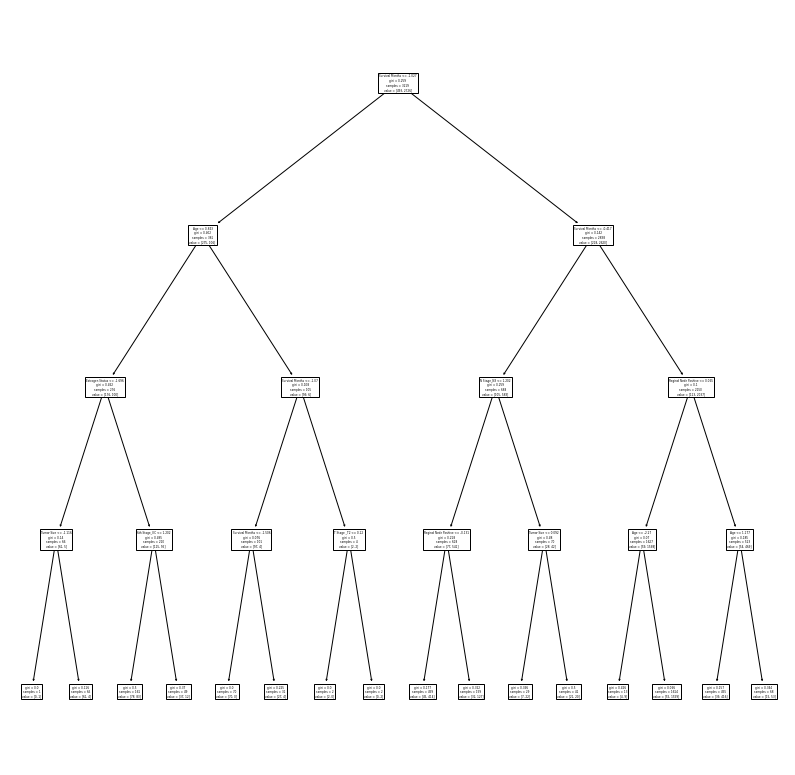

In [37]:
plt.figure(figsize=(14, 14))
tree.plot_tree(novo_modelo, feature_names=X_train.columns)
plt.show()